In [4]:
import scanpy as sc
import anndata
import pandas as pd
import numpy as np

In [3]:
import scipy as sp

# Convert c25_wt to Seurat

In [10]:
adata0 = sc.read('./write/All_outer_filtered.h5ad')

In [53]:
adata0.obs['CT_fateid_v2'] = ['T-cells 2' if (adata0.obs['Leiden_v1'][x]=='15' and adata0.obs['CT_new2'][x]=='T-cells') else adata0.obs['CT_endov2'][x] for x in adata0.obs_names]

In [54]:
adata0.obs['EHT_tc'] = adata0.obs.CT_fateid_v2.astype('category').cat.rename_categories({
    'Endocardium (Inflam.)':'tc0',
    'EHT-2':'tc2',
    'EHT-4':'tc4',
    'EHT-1':'tc1',
    'EHT-3':'tc3',
    'T-cells 2':'tc5',
    'Macrophage 2':'tc6',
})

In [83]:
adata0.write('./write/All_outer_filtered.h5ad')

In [55]:
adata = adata0[adata0.obs.EHT_tc.str.startswith('tc')]

In [56]:
adata

View of AnnData object with n_obs × n_vars = 2992 × 9468
    obs: 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'n_counts', 'phase', 'S_score', 'G2M_score', 'EGFP', 'FishID', 'Treatment', 'RFP', 'db_scores', 'FishID_new', 'CellID', 'Cell', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'time', 'morphine', 'AV', 'inhib', 'so.far.ident.subtypes', 'so.far.ident', 'RNA_snn_res.4', 'seurat_clusters', 'work.ident', 'fibro.subtypes', 'is.inhib', 'split.inhib', 'zoom.ident', 'zoom.subtypes', 'plot.ident', 'CM.ident', 'paper.ident', 'RNA_snn_res.2', 'RNA_snn_res.3', 'RNA_snn_res.3.5', 'work.ident2', '

In [57]:
adata.obs.EHT_tc.cat.categories

Index(['tc1', 'tc2', 'tc3', 'tc4', 'tc0', 'tc6', 'tc5'], dtype='object')

In [58]:
adata.obs['EHT_num'] = adata.obs.EHT_tc.cat.rename_categories({
    'tc0':0,
    'tc1':1,
    'tc2':2,
    'tc3':3,
    'tc4':4,
    'tc5':5,
    'tc6':6,
})

/tmp/ipykernel_410780/3845666789.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['EHT_num'] = adata.obs.EHT_tc.cat.rename_categories({


In [59]:
adata.obs.EHT_num.value_counts()

6    1256
0     687
2     379
4     309
5     140
1     123
3      98
Name: EHT_num, dtype: int64

In [60]:
adata.obs['EHT'] = 'EHT' + adata.obs['EHT_num'].astype('str')

In [61]:
adata.write('./write/c25LeukoEndov2_wt_filtered.h5ad')

In [62]:
adata.obs['UMAP_1'] = pd.DataFrame(adata.obsm['X_umap'],index=adata.obs_names)[0]
adata.obs['UMAP_2'] = pd.DataFrame(adata.obsm['X_umap'],index=adata.obs_names)[1]

In [63]:
adata.obs.head()

,Index,Age,Development_stage,Condition,Day,Strain,Tissue,StudyID,CellType,Genotype,...,Days,Leiden_sub_c20,Endo_type,inflammatory_Endo,CT_endov2,CT_fateid_v2,EHT_tc,EHT,UMAP_1,UMAP_2
H5_AGCCTAATCTGGGCCA-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,...,Day0,23,NaN,Other cell,Macrophage 2,Macrophage 2,tc6,EHT6,6.786125,-2.189691
H5_CATTCGCGTGTGCGTC-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,...,Day0,25,NaN,Other cell,EHT-4,EHT-4,tc4,EHT4,7.451823,-0.124400
H5_TACTTACTCAAGAAGT-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,...,Day0,"20,3",NaN,Other cell,Macrophage 2,Macrophage 2,tc6,EHT6,8.785749,-0.588229
H5_TCAGATGCACCAGCAC-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,...,Day0,"20,0",NaN,Other cell,Macrophage 2,Macrophage 2,tc6,EHT6,8.911777,-1.945594
H5_TGAAAGAAGCGCTTAT-3,GSM4817928,4-12m,adult,Healthy,0,Zebrabow M,heart,GSE159032,All cells,WT,...,Day0,"20,0",NaN,Other cell,Macrophage 2,Macrophage 2,tc6,EHT6,9.533280,-2.826561


In [64]:
#adata.var.to_csv('./Files/c25_hvg_raw_var.csv')
adata.obs.to_csv('./Files/c25LeukoEndov2.hvg_obs.csv')

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


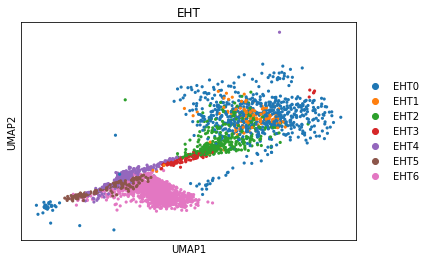

In [65]:
sc.pl.umap(adata,color='EHT')

In [103]:
# umap = pd.DataFrame(adata.obsm['X_umap'],index=adata.obs_names,columns=['UMAP1','UMAP2'])
# umap.to_csv('./write/Koth_umap.csv')

In [66]:
adata1 = anndata.AnnData(X=adata.raw.X,var=adata.raw.var,obs=adata.obs)

In [67]:
adata1.var = pd.DataFrame(adata1.var.index,index=adata1.var.index)
adata1.obs = pd.DataFrame(adata1.obs.index,index=adata1.obs.index)
adata1.var = adata1.var.drop(columns=0)
adata1.obs = adata1.obs.drop(columns=0)

In [68]:
adata1.shape

(2992, 40796)

In [27]:
c25 = sc.read('./write/c25_wt_filtered_original_dpt.h5ad')

In [69]:
adata2 = adata1[:, c25.var_names].copy()
adata3 = adata2[:, c25.var.highly_variable].copy()

In [70]:
adata2

AnnData object with n_obs × n_vars = 2992 × 9468

In [71]:
adata3

AnnData object with n_obs × n_vars = 2992 × 1360

In [72]:
adata3.write('./write/c25LeukoEndov2.hvg.rawcnts.h5ad')

In [73]:
adata1.write('./write/c25LeukoEndov2.allg.rawcnts.h5ad')

# Extract meta for lineage analysis

In [74]:
Hu_wt_filtered = sc.read('./write/Hu_WTfiltered_processed.h5ad')

In [77]:
Hu_wt_filtered.obs['CT_fateid_v2'] = adata0.obs['CT_fateid_v2']

In [78]:
Hu_wt_filtered.obs['CT_fateid_v2']

H5_AAATGCCTCTTCGAGA-3            Bl.ves.EC
H5_AAGCCGCTCCAAGCCG-3         Thrombocytes
H5_ACACCGGAGCTTATCG-3         Thrombocytes
H5_ACCGTAATCGGTTCGG-3         Thrombocytes
H5_ACGATGTTCTCAACTT-3         Thrombocytes
                                ...       
Hr27_TTTGTTGAGCAAATGT-3       Endocardium 
Hr27_TTTGTTGAGCCTATTG-3        Neutrophils
Hr27_TTTGTTGAGGAGACCT-3    Cardiomyocytes 
Hr27_TTTGTTGCAAACGGCA-3       Endocardium 
Hr27_TTTGTTGGTCGCACGT-3       Endocardium 
Name: CT_fateid_v2, Length: 140792, dtype: object

In [79]:
Hu_wt_filtered.obs.to_csv('Data/Hu_wt_filtered_fateid_v2.obs.csv')

In [81]:
Hu_wt_filtered.write('./write/Hu_WTfiltered_processed.h5ad')

In [84]:
del(Hu_wt_filtered)
del(adata0)